# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


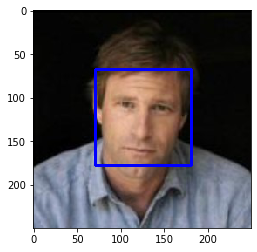

In [6]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [7]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
- Human Faces detected in human images  97.0 %
- Human Faces detected in dog images    18.0 %

In [8]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

face_count = 0
dog_count  = 0
for i in range(len(human_files_short)):
    if face_detector(human_files_short[i]):
        face_count += 1
    if face_detector(dog_files_short[i]):
        dog_count  += 1
        
print ("Human Faces detected in human images ", face_count/len(human_files_short)*100.0, "%")
print ("Human Faces detected in dog images   ", dog_count/len(dog_files_short)*100.0, "%")


Human Faces detected in human images  97.0 %
Human Faces detected in dog images    18.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
from PIL import Image
import torchvision.transforms as transforms

maxsize = 224

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = Image.open(img_path).convert('RGB')
    if max(image.size) > maxsize:
        size = maxsize
    else:
        size = max(image.size)
        
    in_transform = transforms.Compose([
                        transforms.RandomResizedCrop(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
        
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    if (use_cuda):
        image = image.to("cuda")
    
    probabilities = VGG16(image)
    
    index = torch.max(probabilities,1)
    
    return index[1]

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    index = VGG16_predict(img_path)
    
    return ((index >= 151) and (index <= 268))

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- Dog Faces detected in human images  0.0 %
- Dog Faces detected in dog images    96.0 %

In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

face_count = 0
dog_count  = 0
for i in range(len(human_files_short)):
    if dog_detector(human_files_short[i]):
        face_count += 1
    if dog_detector(dog_files_short[i]):
        dog_count  += 1
        
print ("Dog Faces detected in human images ", face_count/len(human_files_short)*100.0, "%")
print ("Dog Faces detected in dog images   ", dog_count/len(dog_files_short)*100.0, "%")


Dog Faces detected in human images  0.0 %
Dog Faces detected in dog images    91.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
import numpy as np
import torch
import os
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
        
in_transform = transforms.Compose([
                    transforms.RandomAffine(10,translate=(0.2,0.2)),
                    transforms.RandomCrop(256,pad_if_needed=True,padding_mode='edge'),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), 
                                         (0.229, 0.224, 0.225))])

train_data = "/data/dog_images/train"
valid_data = "/data/dog_images/valid"
test_data  = "/data/dog_images/test"

train_loader = datasets.ImageFolder(train_data, transform=in_transform)
valid_loader = datasets.ImageFolder(train_data, transform=in_transform)
test_loader  = datasets.ImageFolder(test_data,  transform=in_transform)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

# check if CUDA is available
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print ("running on device ", device, "\n")


running on device  cuda 



**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- Code crops images to 256x256, close to the size recommended for VDD16. Normalize to same values as VDD16.  They seemed like good values.  Won't be too big for excessive computation time, yet still big enough for detail.  It's a power of 2 so sould scale well in the convolutional layers.  Normalization will keep values around -1 to 1 and should help with training.
- Added Random Affine to transforms.  This should help with training since it will randomly rotate/translate the picture to minimize local minimum.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [3]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,  16, 3, padding=1)   # 3x256x256  => 256x256x16
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)   # 128x128x16 => 128x128x32
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)   # 64x64x32   => 64x64x64
       
        self.pool = nn.MaxPool2d(2, 2)   # max pooling layer, divide by two
        
        # output layers
        self.out1 = nn.Linear(32*32*64, 500) # 32x32x64 => 500
        self.out2 = nn.Linear(500, 133)      # 500      => 133
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = x.view(1, 3, 256, 256)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 32*32*64)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.out1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.out2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#
## Yes, I do if I want to be able to understand cuda vs cpu ##

# instantiate the CNN
model_scratch = Net().to(device=device)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
- Wanted to increase the number of features in each convolutional layer as the pooling decreases the image size.  This should help distinguish between the 118 different dog breed types.
- In the fully connected layers, I wanted to have more outputs than inputs, with a final result os 118 for the dog breeds.
- Copied some of the above variables down here so I would not have to rerun everything each time I switch between cpu and cuda, or when I start again the next day.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [4]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss().to(device=device)

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [6]:
# accomodate truncated image files in the database
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        print ('epoch: {:5}'.format(epoch))
        
        ###################
        # train the model #
        ###################
        model.train()
        
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # migrate data to proper device
            data   = data.to(device=device)
            target = torch.tensor([target],device=device)
            
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            ## update running average for training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if ((batch_idx % 1000) == 0):
                print ('batch_idx: {:5}, train_loss: {:.6f}'.format(batch_idx, train_loss))
        
        print ('final train_loss: {:.6f}'.format(train_loss))
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            data = data.to(device=device)
            ## update the average validation loss
            output = model(data)
            target = torch.tensor([target],device=device)
                
            loss = criterion(output, target)
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            if ((batch_idx % 1000) == 0):
                print ('batch_idx: {:5}, valid_loss: {:.6f}'.format(batch_idx, valid_loss))
            
        # print training/validation statistics 
        print('Training Loss: {:.6f} \tValidation Loss: {:.6f}'.format(train_loss, valid_loss))
        
        ## TODO: save the model if validation loss has decreased
        
        if (valid_loss_min > valid_loss):
            print('Training loss decreased ({:.6f} --> {:.6f}).  Saving model ...'
                  .format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(500, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, (device=='cuda'), 'model_scratch.pt')


epoch:     1
batch_idx:     0, train_loss: 10.633940
batch_idx:  1000, train_loss: 1.014638
batch_idx:  2000, train_loss: 0.978182
batch_idx:  3000, train_loss: 0.981838
batch_idx:  4000, train_loss: 0.911053
batch_idx:  5000, train_loss: 0.903607
batch_idx:  6000, train_loss: 0.919145
final train_loss: 0.965437
batch_idx:     0, valid_loss: 9.761345
batch_idx:  1000, valid_loss: 11.571132
batch_idx:  2000, valid_loss: 13.357228
batch_idx:  3000, valid_loss: 13.964989
batch_idx:  4000, valid_loss: 14.291295
batch_idx:  5000, valid_loss: 14.510395
batch_idx:  6000, valid_loss: 14.463644
Training Loss: 0.965437 	Validation Loss: 14.069354
Training loss decreased (inf --> 14.069354).  Saving model ...
epoch:     2
batch_idx:     0, train_loss: 9.120950
batch_idx:  1000, train_loss: 0.736442
batch_idx:  2000, train_loss: 0.771611
batch_idx:  3000, train_loss: 0.849800
batch_idx:  4000, train_loss: 0.913629
batch_idx:  5000, train_loss: 0.964417
batch_idx:  6000, train_loss: 0.994361
final 

batch_idx:  5000, train_loss: 0.506766
batch_idx:  6000, train_loss: 0.564415
final train_loss: 0.599064
batch_idx:     0, valid_loss: 11.915812
batch_idx:  1000, valid_loss: 16.487221
batch_idx:  2000, valid_loss: 17.483427
batch_idx:  3000, valid_loss: 17.736103
batch_idx:  4000, valid_loss: 18.105663
batch_idx:  5000, valid_loss: 18.196455
batch_idx:  6000, valid_loss: 17.867443
Training Loss: 0.599064 	Validation Loss: 17.182980
epoch:    14
batch_idx:     0, train_loss: 4.216806
batch_idx:  1000, train_loss: 0.748145
batch_idx:  2000, train_loss: 0.763564
batch_idx:  3000, train_loss: 0.850661
batch_idx:  4000, train_loss: 0.757600
batch_idx:  5000, train_loss: 0.672688
batch_idx:  6000, train_loss: 0.631766
final train_loss: 0.615836
batch_idx:     0, valid_loss: 7.259271
batch_idx:  1000, valid_loss: 14.417112
batch_idx:  2000, valid_loss: 17.391836
batch_idx:  3000, valid_loss: 18.857258
batch_idx:  4000, valid_loss: 19.718985
batch_idx:  5000, valid_loss: 20.249964
batch_idx: 

batch_idx:  1000, train_loss: 0.320180
batch_idx:  2000, train_loss: 0.338127
batch_idx:  3000, train_loss: 0.345712
batch_idx:  4000, train_loss: 0.338137
batch_idx:  5000, train_loss: 0.340388
batch_idx:  6000, train_loss: 0.357004
final train_loss: 0.366381
batch_idx:     0, valid_loss: 7.144929
batch_idx:  1000, valid_loss: 15.331645
batch_idx:  2000, valid_loss: 18.466839
batch_idx:  3000, valid_loss: 19.929586
batch_idx:  4000, valid_loss: 20.973005
batch_idx:  5000, valid_loss: 21.610580
batch_idx:  6000, valid_loss: 21.549429
Training Loss: 0.366381 	Validation Loss: 20.606956
epoch:    27
batch_idx:     0, train_loss: 4.457152
batch_idx:  1000, train_loss: 0.331324
batch_idx:  2000, train_loss: 0.364780
batch_idx:  3000, train_loss: 0.370016
batch_idx:  4000, train_loss: 0.387632
batch_idx:  5000, train_loss: 0.459476
batch_idx:  6000, train_loss: 0.540406
final train_loss: 0.576915
batch_idx:     0, valid_loss: 9.949520
batch_idx:  1000, valid_loss: 13.117075
batch_idx:  2000

batch_idx:  5000, valid_loss: 21.555384
batch_idx:  6000, valid_loss: 21.690317
Training Loss: 0.378865 	Validation Loss: 20.802219
epoch:    39
batch_idx:     0, train_loss: 8.401537
batch_idx:  1000, train_loss: 0.323269
batch_idx:  2000, train_loss: 0.352604
batch_idx:  3000, train_loss: 0.366412
batch_idx:  4000, train_loss: 0.423649
batch_idx:  5000, train_loss: 0.482085
batch_idx:  6000, train_loss: 0.598176
final train_loss: 0.740039
batch_idx:     0, valid_loss: 9.990647
batch_idx:  1000, valid_loss: 9.769981
batch_idx:  2000, valid_loss: 9.822302
batch_idx:  3000, valid_loss: 9.812899
batch_idx:  4000, valid_loss: 9.856185
batch_idx:  5000, valid_loss: 9.868742
batch_idx:  6000, valid_loss: 9.715224
Training Loss: 0.740039 	Validation Loss: 9.369958
Training loss decreased (9.439337 --> 9.369958).  Saving model ...
epoch:    40
batch_idx:     0, train_loss: 11.912059
batch_idx:  1000, train_loss: 1.340399
batch_idx:  2000, train_loss: 1.400946
batch_idx:  3000, train_loss: 1.5

final train_loss: 0.411299
batch_idx:     0, valid_loss: 7.432005
batch_idx:  1000, valid_loss: 13.937018
batch_idx:  2000, valid_loss: 16.706505
batch_idx:  3000, valid_loss: 17.579870
batch_idx:  4000, valid_loss: 18.052496
batch_idx:  5000, valid_loss: 18.338457
batch_idx:  6000, valid_loss: 18.071186
Training Loss: 0.411299 	Validation Loss: 17.401209
epoch:    52
batch_idx:     0, train_loss: 7.853501
batch_idx:  1000, train_loss: 0.486240
batch_idx:  2000, train_loss: 0.533136
batch_idx:  3000, train_loss: 0.582683
batch_idx:  4000, train_loss: 0.587575
batch_idx:  5000, train_loss: 0.639329
batch_idx:  6000, train_loss: 0.676458
final train_loss: 0.717805
batch_idx:     0, valid_loss: 10.500446
batch_idx:  1000, valid_loss: 13.248517
batch_idx:  2000, valid_loss: 14.615256
batch_idx:  3000, valid_loss: 15.021646
batch_idx:  4000, valid_loss: 15.242042
batch_idx:  5000, valid_loss: 15.387865
batch_idx:  6000, valid_loss: 15.343539
Training Loss: 0.717805 	Validation Loss: 14.8040

batch_idx:  3000, train_loss: 1.505845
batch_idx:  4000, train_loss: 1.319196
batch_idx:  5000, train_loss: 1.158626
batch_idx:  6000, train_loss: 1.092356
final train_loss: 1.041124
batch_idx:     0, valid_loss: 11.041579
batch_idx:  1000, valid_loss: 15.180614
batch_idx:  2000, valid_loss: 16.002794
batch_idx:  3000, valid_loss: 16.303673
batch_idx:  4000, valid_loss: 16.465427
batch_idx:  5000, valid_loss: 16.517878
batch_idx:  6000, valid_loss: 16.125486
Training Loss: 1.041124 	Validation Loss: 15.601315
epoch:    65
batch_idx:     0, train_loss: 14.094395
batch_idx:  1000, train_loss: 0.926826
batch_idx:  2000, train_loss: 0.982009
batch_idx:  3000, train_loss: 1.073463
batch_idx:  4000, train_loss: 1.160406
batch_idx:  5000, train_loss: 1.277279
batch_idx:  6000, train_loss: 1.250036
final train_loss: 1.269241
batch_idx:     0, valid_loss: 9.568274
batch_idx:  1000, valid_loss: 11.077453
batch_idx:  2000, valid_loss: 11.985144
batch_idx:  3000, valid_loss: 12.307068
batch_idx:  

batch_idx:  4000, valid_loss: 20.088739
batch_idx:  5000, valid_loss: 20.608150
batch_idx:  6000, valid_loss: 20.468855
Training Loss: 1.311562 	Validation Loss: 19.616318
epoch:    77
batch_idx:     0, train_loss: 7.120411
batch_idx:  1000, train_loss: 0.332116
batch_idx:  2000, train_loss: 0.344770
batch_idx:  3000, train_loss: 0.357642
batch_idx:  4000, train_loss: 0.364562
batch_idx:  5000, train_loss: 0.385492
batch_idx:  6000, train_loss: 0.421033
final train_loss: 0.445464
batch_idx:     0, valid_loss: 8.287199
batch_idx:  1000, valid_loss: 12.020298
batch_idx:  2000, valid_loss: 15.015246
batch_idx:  3000, valid_loss: 16.208565
batch_idx:  4000, valid_loss: 16.794836
batch_idx:  5000, valid_loss: 17.050018
batch_idx:  6000, valid_loss: 16.719975
Training Loss: 0.445464 	Validation Loss: 16.065683
epoch:    78
batch_idx:     0, train_loss: 5.442532
batch_idx:  1000, train_loss: 0.510644
batch_idx:  2000, train_loss: 0.519972
batch_idx:  3000, train_loss: 0.551641
batch_idx:  400

batch_idx:  1000, valid_loss: 9.308616
batch_idx:  2000, valid_loss: 9.299588
batch_idx:  3000, valid_loss: 9.338302
batch_idx:  4000, valid_loss: 9.351686
batch_idx:  5000, valid_loss: 9.307673
batch_idx:  6000, valid_loss: 9.339553
Training Loss: 1.514581 	Validation Loss: 9.093248
epoch:    90
batch_idx:     0, train_loss: 11.136989
batch_idx:  1000, train_loss: 1.470454
batch_idx:  2000, train_loss: 1.373357
batch_idx:  3000, train_loss: 1.327893
batch_idx:  4000, train_loss: 1.396127
batch_idx:  5000, train_loss: 1.530256
batch_idx:  6000, train_loss: 1.657260
final train_loss: 1.686203
batch_idx:     0, valid_loss: 9.717545
batch_idx:  1000, valid_loss: 9.925369
batch_idx:  2000, valid_loss: 9.938516
batch_idx:  3000, valid_loss: 9.954814
batch_idx:  4000, valid_loss: 9.968889
batch_idx:  5000, valid_loss: 9.975702
batch_idx:  6000, valid_loss: 9.882918
Training Loss: 1.686203 	Validation Loss: 9.547972
epoch:    91
batch_idx:     0, train_loss: 4.654214
batch_idx:  1000, train_l

batch_idx:  3000, train_loss: 1.462822
batch_idx:  4000, train_loss: 1.445030
batch_idx:  5000, train_loss: 1.412455
batch_idx:  6000, train_loss: 1.503350
final train_loss: 1.559587
batch_idx:     0, valid_loss: 9.251874
batch_idx:  1000, valid_loss: 9.935673
batch_idx:  2000, valid_loss: 9.997881
batch_idx:  3000, valid_loss: 10.076008
batch_idx:  4000, valid_loss: 10.152212
batch_idx:  5000, valid_loss: 10.069358
batch_idx:  6000, valid_loss: 9.835522
Training Loss: 1.559587 	Validation Loss: 9.465801
epoch:   103
batch_idx:     0, train_loss: 12.395994
batch_idx:  1000, train_loss: 1.890268
batch_idx:  2000, train_loss: 2.035394
batch_idx:  3000, train_loss: 1.905062
batch_idx:  4000, train_loss: 1.906365
batch_idx:  5000, train_loss: 1.958287
batch_idx:  6000, train_loss: 1.994651
final train_loss: 1.946187
batch_idx:     0, valid_loss: 8.032546
batch_idx:  1000, valid_loss: 8.051233
batch_idx:  2000, valid_loss: 9.715311
batch_idx:  3000, valid_loss: 10.176108
batch_idx:  4000, v

batch_idx:  1000, train_loss: 0.616154
batch_idx:  2000, train_loss: 0.967452
batch_idx:  3000, train_loss: 1.071401
batch_idx:  4000, train_loss: 1.144935
batch_idx:  5000, train_loss: 1.221904
batch_idx:  6000, train_loss: 1.311555
final train_loss: 1.292012
batch_idx:     0, valid_loss: 6.536182
batch_idx:  1000, valid_loss: 12.099361
batch_idx:  2000, valid_loss: 14.330345
batch_idx:  3000, valid_loss: 15.545397
batch_idx:  4000, valid_loss: 16.458055
batch_idx:  5000, valid_loss: 17.130789
batch_idx:  6000, valid_loss: 16.946989
Training Loss: 1.292012 	Validation Loss: 16.315504
epoch:   116
batch_idx:     0, train_loss: 7.495428
batch_idx:  1000, train_loss: 0.291090
batch_idx:  2000, train_loss: 0.307916
batch_idx:  3000, train_loss: 0.317403
batch_idx:  4000, train_loss: 0.327488
batch_idx:  5000, train_loss: 0.349589
batch_idx:  6000, train_loss: 0.369562
final train_loss: 0.384354
batch_idx:     0, valid_loss: 6.052180
batch_idx:  1000, valid_loss: 12.833752
batch_idx:  2000

batch_idx:  6000, valid_loss: 9.963094
Training Loss: 1.637087 	Validation Loss: 9.618376
epoch:   128
batch_idx:     0, train_loss: 12.651239
batch_idx:  1000, train_loss: 1.560781
batch_idx:  2000, train_loss: 1.738287
batch_idx:  3000, train_loss: 1.738738
batch_idx:  4000, train_loss: 1.649483
batch_idx:  5000, train_loss: 1.705714
batch_idx:  6000, train_loss: 1.762346
final train_loss: 1.783987
batch_idx:     0, valid_loss: 9.698171
batch_idx:  1000, valid_loss: 10.358586
batch_idx:  2000, valid_loss: 10.421602
batch_idx:  3000, valid_loss: 10.417812
batch_idx:  4000, valid_loss: 10.490446
batch_idx:  5000, valid_loss: 10.527038
batch_idx:  6000, valid_loss: 10.285384
Training Loss: 1.783987 	Validation Loss: 9.895941
epoch:   129
batch_idx:     0, train_loss: 12.734278
batch_idx:  1000, train_loss: 1.983322
batch_idx:  2000, train_loss: 2.084178
batch_idx:  3000, train_loss: 1.771439
batch_idx:  4000, train_loss: 1.670081
batch_idx:  5000, train_loss: 1.589719
batch_idx:  6000, 

batch_idx:  2000, valid_loss: 10.683403
batch_idx:  3000, valid_loss: 10.696327
batch_idx:  4000, valid_loss: 10.677145
batch_idx:  5000, valid_loss: 10.445643
batch_idx:  6000, valid_loss: 10.100310
Training Loss: 1.462820 	Validation Loss: 9.704869
epoch:   141
batch_idx:     0, train_loss: 12.493339
batch_idx:  1000, train_loss: 1.699550
batch_idx:  2000, train_loss: 1.664368
batch_idx:  3000, train_loss: 1.500050
batch_idx:  4000, train_loss: 1.397507
batch_idx:  5000, train_loss: 1.317345
batch_idx:  6000, train_loss: 1.386112
final train_loss: 1.404364
batch_idx:     0, valid_loss: 11.896032
batch_idx:  1000, valid_loss: 11.935003
batch_idx:  2000, valid_loss: 11.486614
batch_idx:  3000, valid_loss: 11.795334
batch_idx:  4000, valid_loss: 12.146322
batch_idx:  5000, valid_loss: 12.349952
batch_idx:  6000, valid_loss: 12.266519
Training Loss: 1.404364 	Validation Loss: 11.833409
epoch:   142
batch_idx:     0, train_loss: 6.791263
batch_idx:  1000, train_loss: 1.472195
batch_idx:  

batch_idx:  6000, train_loss: 1.526612
final train_loss: 1.656904
batch_idx:     0, valid_loss: 8.849884
batch_idx:  1000, valid_loss: 10.075924
batch_idx:  2000, valid_loss: 10.163121
batch_idx:  3000, valid_loss: 10.132865
batch_idx:  4000, valid_loss: 9.951776
batch_idx:  5000, valid_loss: 9.745393
batch_idx:  6000, valid_loss: 9.392341
Training Loss: 1.656904 	Validation Loss: 9.001919
epoch:   154
batch_idx:     0, train_loss: 9.810859
batch_idx:  1000, train_loss: 1.748853
batch_idx:  2000, train_loss: 1.423612
batch_idx:  3000, train_loss: 1.350317
batch_idx:  4000, train_loss: 1.483385
batch_idx:  5000, train_loss: 1.648069
batch_idx:  6000, train_loss: 1.814676
final train_loss: 1.962336
batch_idx:     0, valid_loss: 7.990786
batch_idx:  1000, valid_loss: 7.672784
batch_idx:  2000, valid_loss: 8.682210
batch_idx:  3000, valid_loss: 9.322113
batch_idx:  4000, valid_loss: 9.613111
batch_idx:  5000, valid_loss: 9.656886
batch_idx:  6000, valid_loss: 9.484222
Training Loss: 1.9623

batch_idx:  3000, train_loss: 1.376648
batch_idx:  4000, train_loss: 1.349700
batch_idx:  5000, train_loss: 1.448379
batch_idx:  6000, train_loss: 1.483496
final train_loss: 1.552906
batch_idx:     0, valid_loss: 9.848550
batch_idx:  1000, valid_loss: 10.024994
batch_idx:  2000, valid_loss: 10.157029
batch_idx:  3000, valid_loss: 10.185193
batch_idx:  4000, valid_loss: 10.199237
batch_idx:  5000, valid_loss: 10.134998
batch_idx:  6000, valid_loss: 9.848102
Training Loss: 1.552906 	Validation Loss: 9.481497
epoch:   167
batch_idx:     0, train_loss: 4.500287
batch_idx:  1000, train_loss: 1.771743
batch_idx:  2000, train_loss: 1.267135
batch_idx:  3000, train_loss: 0.972106
batch_idx:  4000, train_loss: 0.852747
batch_idx:  5000, train_loss: 0.800684
batch_idx:  6000, train_loss: 0.797113
final train_loss: 0.816780
batch_idx:     0, valid_loss: 9.875921
batch_idx:  1000, valid_loss: 11.812125
batch_idx:  2000, valid_loss: 14.562203
batch_idx:  3000, valid_loss: 15.522734
batch_idx:  4000

batch_idx:  1000, train_loss: 2.039026
batch_idx:  2000, train_loss: 1.548138
batch_idx:  3000, train_loss: 1.553462
batch_idx:  4000, train_loss: 1.539840
batch_idx:  5000, train_loss: 1.636101
batch_idx:  6000, train_loss: 1.679273
final train_loss: 1.769007
batch_idx:     0, valid_loss: 9.002757
batch_idx:  1000, valid_loss: 9.378140
batch_idx:  2000, valid_loss: 9.600018
batch_idx:  3000, valid_loss: 9.656013
batch_idx:  4000, valid_loss: 9.582648
batch_idx:  5000, valid_loss: 9.392822
batch_idx:  6000, valid_loss: 9.117354
Training Loss: 1.769007 	Validation Loss: 8.742447
epoch:   180
batch_idx:     0, train_loss: 10.367226
batch_idx:  1000, train_loss: 2.250203
batch_idx:  2000, train_loss: 2.097784
batch_idx:  3000, train_loss: 1.957549
batch_idx:  4000, train_loss: 1.892954
batch_idx:  5000, train_loss: 1.959621
batch_idx:  6000, train_loss: 2.054843
final train_loss: 2.176700
batch_idx:     0, valid_loss: 4.076129
batch_idx:  1000, valid_loss: 9.746826
batch_idx:  2000, valid

batch_idx:  5000, valid_loss: 9.954178
batch_idx:  6000, valid_loss: 9.867649
Training Loss: 1.417510 	Validation Loss: 9.537218
epoch:   192
batch_idx:     0, train_loss: 9.883172
batch_idx:  1000, train_loss: 1.850283
batch_idx:  2000, train_loss: 1.692915
batch_idx:  3000, train_loss: 1.653571
batch_idx:  4000, train_loss: 1.679492
batch_idx:  5000, train_loss: 1.754437
batch_idx:  6000, train_loss: 1.707654
final train_loss: 1.941174
batch_idx:     0, valid_loss: 7.791487
batch_idx:  1000, valid_loss: 9.116601
batch_idx:  2000, valid_loss: 10.706686
batch_idx:  3000, valid_loss: 11.653307
batch_idx:  4000, valid_loss: 12.053524
batch_idx:  5000, valid_loss: 12.181334
batch_idx:  6000, valid_loss: 12.043739
Training Loss: 1.941174 	Validation Loss: 11.710904
epoch:   193
batch_idx:     0, train_loss: 4.917046
batch_idx:  1000, train_loss: 1.150742
batch_idx:  2000, train_loss: 1.687880
batch_idx:  3000, train_loss: 1.464780
batch_idx:  4000, train_loss: 1.416054
batch_idx:  5000, tr

batch_idx:  1000, valid_loss: 9.613518
batch_idx:  2000, valid_loss: 9.632249
batch_idx:  3000, valid_loss: 9.634123
batch_idx:  4000, valid_loss: 9.654112
batch_idx:  5000, valid_loss: 9.568261
batch_idx:  6000, valid_loss: 9.299567
Training Loss: 1.875644 	Validation Loss: 8.931631
epoch:   205
batch_idx:     0, train_loss: 11.549079
batch_idx:  1000, train_loss: 1.661991
batch_idx:  2000, train_loss: 1.635865
batch_idx:  3000, train_loss: 1.709276
batch_idx:  4000, train_loss: 1.802953
batch_idx:  5000, train_loss: 1.915189
batch_idx:  6000, train_loss: 1.901430
final train_loss: 1.871958
batch_idx:     0, valid_loss: 8.191433
batch_idx:  1000, valid_loss: 9.288290
batch_idx:  2000, valid_loss: 9.680874
batch_idx:  3000, valid_loss: 9.793471
batch_idx:  4000, valid_loss: 9.864356
batch_idx:  5000, valid_loss: 9.830966
batch_idx:  6000, valid_loss: 9.697964
Training Loss: 1.871958 	Validation Loss: 9.412416
epoch:   206
batch_idx:     0, train_loss: 9.520706
batch_idx:  1000, train_l

batch_idx:  5000, train_loss: 1.950099
batch_idx:  6000, train_loss: 1.966708
final train_loss: 1.882852
batch_idx:     0, valid_loss: 6.519439
batch_idx:  1000, valid_loss: 10.040334
batch_idx:  2000, valid_loss: 11.280352
batch_idx:  3000, valid_loss: 11.548587
batch_idx:  4000, valid_loss: 11.457113
batch_idx:  5000, valid_loss: 11.349034
batch_idx:  6000, valid_loss: 11.113245
Training Loss: 1.882852 	Validation Loss: 10.728235
epoch:   218
batch_idx:     0, train_loss: 8.212432
batch_idx:  1000, train_loss: 1.553379
batch_idx:  2000, train_loss: 1.971442
batch_idx:  3000, train_loss: 1.690847
batch_idx:  4000, train_loss: 1.550133
batch_idx:  5000, train_loss: 1.661540
batch_idx:  6000, train_loss: 1.662106
final train_loss: 1.536399
batch_idx:     0, valid_loss: 5.835615
batch_idx:  1000, valid_loss: 14.512053
batch_idx:  2000, valid_loss: 18.511726
batch_idx:  3000, valid_loss: 20.721735
batch_idx:  4000, valid_loss: 21.915548
batch_idx:  5000, valid_loss: 22.739433
batch_idx:  

batch_idx:  1000, train_loss: 1.725334
batch_idx:  2000, train_loss: 1.738476
batch_idx:  3000, train_loss: 1.761073
batch_idx:  4000, train_loss: 1.772514
batch_idx:  5000, train_loss: 1.778124
batch_idx:  6000, train_loss: 1.848169
final train_loss: 1.909740
batch_idx:     0, valid_loss: 10.078556
batch_idx:  1000, valid_loss: 10.085802
batch_idx:  2000, valid_loss: 10.121454
batch_idx:  3000, valid_loss: 10.110206
batch_idx:  4000, valid_loss: 9.947692
batch_idx:  5000, valid_loss: 9.729257
batch_idx:  6000, valid_loss: 9.408532
Training Loss: 1.909740 	Validation Loss: 9.041711
epoch:   231
batch_idx:     0, train_loss: 9.761908
batch_idx:  1000, train_loss: 2.137649
batch_idx:  2000, train_loss: 2.065853
batch_idx:  3000, train_loss: 1.927213
batch_idx:  4000, train_loss: 2.117857
batch_idx:  5000, train_loss: 2.120301
batch_idx:  6000, train_loss: 2.097842
final train_loss: 2.048335
batch_idx:     0, valid_loss: 12.719818
batch_idx:  1000, valid_loss: 16.175678
batch_idx:  2000, 

batch_idx:  6000, valid_loss: 7.067672
Training Loss: 2.307760 	Validation Loss: 6.742459
epoch:   243
batch_idx:     0, train_loss: 7.917422
batch_idx:  1000, train_loss: 1.759457
batch_idx:  2000, train_loss: 1.582314
batch_idx:  3000, train_loss: 1.805919
batch_idx:  4000, train_loss: 1.961713
batch_idx:  5000, train_loss: 2.119333
batch_idx:  6000, train_loss: 2.157446
final train_loss: 2.141855
batch_idx:     0, valid_loss: 7.300408
batch_idx:  1000, valid_loss: 9.475616
batch_idx:  2000, valid_loss: 10.033765
batch_idx:  3000, valid_loss: 10.149453
batch_idx:  4000, valid_loss: 10.205051
batch_idx:  5000, valid_loss: 10.289742
batch_idx:  6000, valid_loss: 10.234321
Training Loss: 2.141855 	Validation Loss: 9.853326
epoch:   244
batch_idx:     0, train_loss: 8.556833
batch_idx:  1000, train_loss: 1.755307
batch_idx:  2000, train_loss: 1.713088
batch_idx:  3000, train_loss: 2.076357
batch_idx:  4000, train_loss: 2.204919
batch_idx:  5000, train_loss: 2.105804
batch_idx:  6000, tra

batch_idx:  2000, valid_loss: 9.895967
batch_idx:  3000, valid_loss: 9.665642
batch_idx:  4000, valid_loss: 9.479105
batch_idx:  5000, valid_loss: 9.209086
batch_idx:  6000, valid_loss: 8.878664
Training Loss: 2.588430 	Validation Loss: 8.471962
epoch:   256
batch_idx:     0, train_loss: 13.376504
batch_idx:  1000, train_loss: 2.912257
batch_idx:  2000, train_loss: 2.830859
batch_idx:  3000, train_loss: 2.575466
batch_idx:  4000, train_loss: 2.546587
batch_idx:  5000, train_loss: 2.614544
batch_idx:  6000, train_loss: 2.730544
final train_loss: 2.791318
batch_idx:     0, valid_loss: 10.400884
batch_idx:  1000, valid_loss: 10.410488
batch_idx:  2000, valid_loss: 10.203609
batch_idx:  3000, valid_loss: 10.036499
batch_idx:  4000, valid_loss: 9.859917
batch_idx:  5000, valid_loss: 9.595076
batch_idx:  6000, valid_loss: 9.239548
Training Loss: 2.791318 	Validation Loss: 8.828851
epoch:   257
batch_idx:     0, train_loss: 10.501107
batch_idx:  1000, train_loss: 1.940660
batch_idx:  2000, tr

batch_idx:  5000, train_loss: 1.458672
batch_idx:  6000, train_loss: 1.566349
final train_loss: 1.681793
batch_idx:     0, valid_loss: 9.619820
batch_idx:  1000, valid_loss: 9.777710
batch_idx:  2000, valid_loss: 9.976576
batch_idx:  3000, valid_loss: 10.043115
batch_idx:  4000, valid_loss: 10.054517
batch_idx:  5000, valid_loss: 9.935047
batch_idx:  6000, valid_loss: 9.639090
Training Loss: 1.681793 	Validation Loss: 9.243808
epoch:   269
batch_idx:     0, train_loss: 10.207262
batch_idx:  1000, train_loss: 2.173703
batch_idx:  2000, train_loss: 2.036208
batch_idx:  3000, train_loss: 1.859953
batch_idx:  4000, train_loss: 1.931521
batch_idx:  5000, train_loss: 2.090958
batch_idx:  6000, train_loss: 2.210688
final train_loss: 2.401052
batch_idx:     0, valid_loss: 4.716652
batch_idx:  1000, valid_loss: 4.834722
batch_idx:  2000, valid_loss: 5.020211
batch_idx:  3000, valid_loss: 5.033766
batch_idx:  4000, valid_loss: 5.013759
batch_idx:  5000, valid_loss: 4.956158
batch_idx:  6000, val

batch_idx:  2000, train_loss: 1.424445
batch_idx:  3000, train_loss: 1.334747
batch_idx:  4000, train_loss: 1.298312
batch_idx:  5000, train_loss: 1.244344
batch_idx:  6000, train_loss: 1.134979
final train_loss: 1.098363
batch_idx:     0, valid_loss: 10.443865
batch_idx:  1000, valid_loss: 13.534789
batch_idx:  2000, valid_loss: 15.051726
batch_idx:  3000, valid_loss: 15.420016
batch_idx:  4000, valid_loss: 15.542964
batch_idx:  5000, valid_loss: 15.463400
batch_idx:  6000, valid_loss: 15.054364
Training Loss: 1.098363 	Validation Loss: 14.474545
epoch:   282
batch_idx:     0, train_loss: 13.674026
batch_idx:  1000, train_loss: 0.855370
batch_idx:  2000, train_loss: 1.119089
batch_idx:  3000, train_loss: 1.010851
batch_idx:  4000, train_loss: 1.159295
batch_idx:  5000, train_loss: 1.312964
batch_idx:  6000, train_loss: 1.453711
final train_loss: 1.445724
batch_idx:     0, valid_loss: 14.463669
batch_idx:  1000, valid_loss: 16.243698
batch_idx:  2000, valid_loss: 17.795210
batch_idx:  

Training Loss: 3.613804 	Validation Loss: 4.886505
Training loss decreased (4.891576 --> 4.886505).  Saving model ...
epoch:   294
batch_idx:     0, train_loss: 4.933227
batch_idx:  1000, train_loss: 4.622923
batch_idx:  2000, train_loss: 4.639710
batch_idx:  3000, train_loss: 4.739048
batch_idx:  4000, train_loss: 4.773853
batch_idx:  5000, train_loss: 4.789058
batch_idx:  6000, train_loss: 4.842316
final train_loss: 4.862693
batch_idx:     0, valid_loss: 4.926648
batch_idx:  1000, valid_loss: 4.899362
batch_idx:  2000, valid_loss: 4.875026
batch_idx:  3000, valid_loss: 4.899973
batch_idx:  4000, valid_loss: 4.889737
batch_idx:  5000, valid_loss: 4.864377
batch_idx:  6000, valid_loss: 4.878922
Training Loss: 4.862693 	Validation Loss: 4.877790
Training loss decreased (4.886505 --> 4.877790).  Saving model ...
epoch:   295
batch_idx:     0, train_loss: 4.926648
batch_idx:  1000, train_loss: 4.646879
batch_idx:  2000, train_loss: 3.213539
batch_idx:  3000, train_loss: 2.782431
batch_idx

batch_idx:  4000, train_loss: 2.417352
batch_idx:  5000, train_loss: 2.536902
batch_idx:  6000, train_loss: 2.643252
final train_loss: 2.598779
batch_idx:     0, valid_loss: 9.121602
batch_idx:  1000, valid_loss: 9.887319
batch_idx:  2000, valid_loss: 10.919734
batch_idx:  3000, valid_loss: 11.123069
batch_idx:  4000, valid_loss: 11.103667
batch_idx:  5000, valid_loss: 11.102367
batch_idx:  6000, valid_loss: 10.851614
Training Loss: 2.598779 	Validation Loss: 10.387830
epoch:   307
batch_idx:     0, train_loss: 10.867414
batch_idx:  1000, train_loss: 1.984552
batch_idx:  2000, train_loss: 2.288273
batch_idx:  3000, train_loss: 2.114582
batch_idx:  4000, train_loss: 1.929320
batch_idx:  5000, train_loss: 1.990735
batch_idx:  6000, train_loss: 2.060395
final train_loss: 2.139591
batch_idx:     0, valid_loss: 10.720120
batch_idx:  1000, valid_loss: 10.865504
batch_idx:  2000, valid_loss: 10.816996
batch_idx:  3000, valid_loss: 10.666142
batch_idx:  4000, valid_loss: 10.419007
batch_idx:  

batch_idx:  1000, train_loss: 4.685211
batch_idx:  2000, train_loss: 4.737536
batch_idx:  3000, train_loss: 4.772685
batch_idx:  4000, train_loss: 4.810229
batch_idx:  5000, train_loss: 4.834522
batch_idx:  6000, train_loss: 4.845210
final train_loss: 4.866201
batch_idx:     0, valid_loss: 5.024341
batch_idx:  1000, valid_loss: 4.940141
batch_idx:  2000, valid_loss: 4.941825
batch_idx:  3000, valid_loss: 4.926176
batch_idx:  4000, valid_loss: 4.920151
batch_idx:  5000, valid_loss: 4.904591
batch_idx:  6000, valid_loss: 4.881771
Training Loss: 4.866201 	Validation Loss: 4.881269
epoch:   320
batch_idx:     0, train_loss: 5.024341
batch_idx:  1000, train_loss: 4.684465
batch_idx:  2000, train_loss: 4.732946
batch_idx:  3000, train_loss: 4.756684
batch_idx:  4000, train_loss: 4.790054
batch_idx:  5000, train_loss: 4.813300
batch_idx:  6000, train_loss: 4.835429
final train_loss: 4.860491
batch_idx:     0, valid_loss: 4.981931
batch_idx:  1000, valid_loss: 4.939708
batch_idx:  2000, valid_

batch_idx:  6000, valid_loss: 10.212828
Training Loss: 2.629762 	Validation Loss: 9.812587
epoch:   332
batch_idx:     0, train_loss: 12.714636
batch_idx:  1000, train_loss: 2.222173
batch_idx:  2000, train_loss: 2.477890
batch_idx:  3000, train_loss: 2.229430
batch_idx:  4000, train_loss: 2.175928
batch_idx:  5000, train_loss: 2.242645
batch_idx:  6000, train_loss: 2.252115
final train_loss: 2.417308
batch_idx:     0, valid_loss: 4.680094
batch_idx:  1000, valid_loss: 4.683194
batch_idx:  2000, valid_loss: 4.733537
batch_idx:  3000, valid_loss: 4.800536
batch_idx:  4000, valid_loss: 4.840321
batch_idx:  5000, valid_loss: 4.854205
batch_idx:  6000, valid_loss: 4.876966
Training Loss: 2.417308 	Validation Loss: 4.876142
epoch:   333
batch_idx:     0, train_loss: 4.707430
batch_idx:  1000, train_loss: 3.242573
batch_idx:  2000, train_loss: 2.372017
batch_idx:  3000, train_loss: 2.130555
batch_idx:  4000, train_loss: 2.066437
batch_idx:  5000, train_loss: 2.269127
batch_idx:  6000, train_

final train_loss: 0.489428
batch_idx:     0, valid_loss: 5.787465
batch_idx:  1000, valid_loss: 15.581213
batch_idx:  2000, valid_loss: 18.108515
batch_idx:  3000, valid_loss: 19.796890
batch_idx:  4000, valid_loss: 20.556442
batch_idx:  5000, valid_loss: 20.781488
batch_idx:  6000, valid_loss: 20.307957
Training Loss: 0.489428 	Validation Loss: 19.261929
epoch:   345
batch_idx:     0, train_loss: 5.854295
batch_idx:  1000, train_loss: 0.566304
batch_idx:  2000, train_loss: 0.779678
batch_idx:  3000, train_loss: 0.647464
batch_idx:  4000, train_loss: 0.597052
batch_idx:  5000, train_loss: 0.575811
batch_idx:  6000, train_loss: 0.596362
final train_loss: 0.627061
batch_idx:     0, valid_loss: 10.920990
batch_idx:  1000, valid_loss: 16.158489
batch_idx:  2000, valid_loss: 18.589069
batch_idx:  3000, valid_loss: 19.732765
batch_idx:  4000, valid_loss: 20.263668
batch_idx:  5000, valid_loss: 20.470556
batch_idx:  6000, valid_loss: 20.119358
Training Loss: 0.627061 	Validation Loss: 19.2733

batch_idx:  3000, train_loss: 1.346431
batch_idx:  4000, train_loss: 1.237223
batch_idx:  5000, train_loss: 1.194858
batch_idx:  6000, train_loss: 1.239250
final train_loss: 1.274354
batch_idx:     0, valid_loss: 7.195230
batch_idx:  1000, valid_loss: 10.715956
batch_idx:  2000, valid_loss: 11.142427
batch_idx:  3000, valid_loss: 11.292014
batch_idx:  4000, valid_loss: 11.346212
batch_idx:  5000, valid_loss: 11.352058
batch_idx:  6000, valid_loss: 11.002660
Training Loss: 1.274354 	Validation Loss: 10.527892
epoch:   358
batch_idx:     0, train_loss: 10.238842
batch_idx:  1000, train_loss: 2.053955
batch_idx:  2000, train_loss: 2.322799
batch_idx:  3000, train_loss: 2.262905
batch_idx:  4000, train_loss: 2.149853
batch_idx:  5000, train_loss: 2.065186
batch_idx:  6000, train_loss: 2.064979
final train_loss: 2.129542
batch_idx:     0, valid_loss: 4.726344
batch_idx:  1000, valid_loss: 4.808963
batch_idx:  2000, valid_loss: 4.767081
batch_idx:  3000, valid_loss: 4.805691
batch_idx:  4000

batch_idx:  1000, train_loss: 2.387457
batch_idx:  2000, train_loss: 2.465652
batch_idx:  3000, train_loss: 2.146252
batch_idx:  4000, train_loss: 1.906412
batch_idx:  5000, train_loss: 1.962906
batch_idx:  6000, train_loss: 1.970076
final train_loss: 2.041450
batch_idx:     0, valid_loss: 11.031732
batch_idx:  1000, valid_loss: 9.638285
batch_idx:  2000, valid_loss: 9.569582
batch_idx:  3000, valid_loss: 9.673795
batch_idx:  4000, valid_loss: 9.628314
batch_idx:  5000, valid_loss: 9.474266
batch_idx:  6000, valid_loss: 9.181670
Training Loss: 2.041450 	Validation Loss: 8.824373
epoch:   371
batch_idx:     0, train_loss: 4.510154
batch_idx:  1000, train_loss: 2.333820
batch_idx:  2000, train_loss: 2.009630
batch_idx:  3000, train_loss: 1.764990
batch_idx:  4000, train_loss: 1.602908
batch_idx:  5000, train_loss: 1.544335
batch_idx:  6000, train_loss: 1.691686
final train_loss: 1.846253
batch_idx:     0, valid_loss: 8.435823
batch_idx:  1000, valid_loss: 8.351549
batch_idx:  2000, valid

Training Loss: 2.823423 	Validation Loss: 7.319324
epoch:   383
batch_idx:     0, train_loss: 5.759406
batch_idx:  1000, train_loss: 1.642974
batch_idx:  2000, train_loss: 2.940823
batch_idx:  3000, train_loss: 3.573613
batch_idx:  4000, train_loss: 3.933125
batch_idx:  5000, train_loss: 3.830971
batch_idx:  6000, train_loss: 3.497968
final train_loss: 3.378896
batch_idx:     0, valid_loss: 7.777269
batch_idx:  1000, valid_loss: 9.477156
batch_idx:  2000, valid_loss: 9.490541
batch_idx:  3000, valid_loss: 9.490710
batch_idx:  4000, valid_loss: 9.530851
batch_idx:  5000, valid_loss: 9.450625
batch_idx:  6000, valid_loss: 9.187299
Training Loss: 3.378896 	Validation Loss: 8.849090
epoch:   384
batch_idx:     0, train_loss: 10.698545
batch_idx:  1000, train_loss: 1.847833
batch_idx:  2000, train_loss: 2.025804
batch_idx:  3000, train_loss: 1.894429
batch_idx:  4000, train_loss: 2.229993
batch_idx:  5000, train_loss: 2.183684
batch_idx:  6000, train_loss: 2.181694
final train_loss: 2.22407

batch_idx:  4000, valid_loss: 10.140915
batch_idx:  5000, valid_loss: 10.240645
batch_idx:  6000, valid_loss: 9.988730
Training Loss: 2.141022 	Validation Loss: 9.590854
epoch:   396
batch_idx:     0, train_loss: 5.094903
batch_idx:  1000, train_loss: 2.082027
batch_idx:  2000, train_loss: 1.988913
batch_idx:  3000, train_loss: 1.991791
batch_idx:  4000, train_loss: 1.846787
batch_idx:  5000, train_loss: 1.841650
batch_idx:  6000, train_loss: 1.893910
final train_loss: 1.902302
batch_idx:     0, valid_loss: 10.182772
batch_idx:  1000, valid_loss: 10.050553
batch_idx:  2000, valid_loss: 10.003337
batch_idx:  3000, valid_loss: 10.041236
batch_idx:  4000, valid_loss: 10.076223
batch_idx:  5000, valid_loss: 10.096632
batch_idx:  6000, valid_loss: 9.835955
Training Loss: 1.902302 	Validation Loss: 9.446580
epoch:   397
batch_idx:     0, train_loss: 5.029304
batch_idx:  1000, train_loss: 1.952297
batch_idx:  2000, train_loss: 1.599988
batch_idx:  3000, train_loss: 1.591652
batch_idx:  4000, 

batch_idx:  1000, valid_loss: 16.643597
batch_idx:  2000, valid_loss: 19.868313
batch_idx:  3000, valid_loss: 20.933554
batch_idx:  4000, valid_loss: 21.175577
batch_idx:  5000, valid_loss: 21.087624
batch_idx:  6000, valid_loss: 20.502764
Training Loss: 1.452366 	Validation Loss: 19.450768
epoch:   409
batch_idx:     0, train_loss: 8.828176
batch_idx:  1000, train_loss: 0.465809
batch_idx:  2000, train_loss: 0.629937
batch_idx:  3000, train_loss: 0.766214
batch_idx:  4000, train_loss: 0.911621
batch_idx:  5000, train_loss: 0.944191
batch_idx:  6000, train_loss: 1.002748
final train_loss: 1.005677
batch_idx:     0, valid_loss: 8.730682
batch_idx:  1000, valid_loss: 13.396412
batch_idx:  2000, valid_loss: 14.062460
batch_idx:  3000, valid_loss: 14.130757
batch_idx:  4000, valid_loss: 14.034107
batch_idx:  5000, valid_loss: 13.787552
batch_idx:  6000, valid_loss: 13.306234
Training Loss: 1.005677 	Validation Loss: 12.823125
epoch:   410
batch_idx:     0, train_loss: 9.500589
batch_idx:  

batch_idx:  5000, train_loss: 1.036917
batch_idx:  6000, train_loss: 1.068736
final train_loss: 1.101270
batch_idx:     0, valid_loss: 9.844763
batch_idx:  1000, valid_loss: 21.263344
batch_idx:  2000, valid_loss: 22.428814
batch_idx:  3000, valid_loss: 22.259977
batch_idx:  4000, valid_loss: 21.904554
batch_idx:  5000, valid_loss: 21.487871
batch_idx:  6000, valid_loss: 20.710686
Training Loss: 1.101270 	Validation Loss: 19.717670
epoch:   422
batch_idx:     0, train_loss: 13.088206
batch_idx:  1000, train_loss: 0.909178
batch_idx:  2000, train_loss: 0.922494
batch_idx:  3000, train_loss: 1.141690
batch_idx:  4000, train_loss: 1.239289
batch_idx:  5000, train_loss: 1.344615
batch_idx:  6000, train_loss: 1.399891
final train_loss: 1.539253
batch_idx:     0, valid_loss: 9.879663
batch_idx:  1000, valid_loss: 10.366734
batch_idx:  2000, valid_loss: 10.418282
batch_idx:  3000, valid_loss: 10.227085
batch_idx:  4000, valid_loss: 10.029622
batch_idx:  5000, valid_loss: 9.801425
batch_idx:  

batch_idx:  1000, train_loss: 2.165009
batch_idx:  2000, train_loss: 2.466832
batch_idx:  3000, train_loss: 2.115527
batch_idx:  4000, train_loss: 2.000234
batch_idx:  5000, train_loss: 2.311538
batch_idx:  6000, train_loss: 2.753646
final train_loss: 2.995627
batch_idx:     0, valid_loss: 4.999565
batch_idx:  1000, valid_loss: 4.929951
batch_idx:  2000, valid_loss: 4.818650
batch_idx:  3000, valid_loss: 4.809360
batch_idx:  4000, valid_loss: 4.888048
batch_idx:  5000, valid_loss: 4.891107
batch_idx:  6000, valid_loss: 4.878995
Training Loss: 2.995627 	Validation Loss: 4.886743
epoch:   435
batch_idx:     0, train_loss: 4.999565
batch_idx:  1000, train_loss: 4.674671
batch_idx:  2000, train_loss: 4.176616
batch_idx:  3000, train_loss: 3.863001
batch_idx:  4000, train_loss: 3.353701
batch_idx:  5000, train_loss: 3.024923
batch_idx:  6000, train_loss: 3.117645
final train_loss: 3.287421
batch_idx:     0, valid_loss: 4.753945
batch_idx:  1000, valid_loss: 4.716319
batch_idx:  2000, valid_

Training Loss: 3.695203 	Validation Loss: 4.885957
epoch:   447
batch_idx:     0, train_loss: 5.043784
batch_idx:  1000, train_loss: 4.490205
batch_idx:  2000, train_loss: 4.599432
batch_idx:  3000, train_loss: 4.649269
batch_idx:  4000, train_loss: 4.667384
batch_idx:  5000, train_loss: 4.701305
batch_idx:  6000, train_loss: 4.811792
final train_loss: 4.860440
batch_idx:     0, valid_loss: 4.968073
batch_idx:  1000, valid_loss: 4.808880
batch_idx:  2000, valid_loss: 4.835978
batch_idx:  3000, valid_loss: 4.824033
batch_idx:  4000, valid_loss: 4.797229
batch_idx:  5000, valid_loss: 4.782808
batch_idx:  6000, valid_loss: 4.847041
Training Loss: 4.860440 	Validation Loss: 4.873149
epoch:   448
batch_idx:     0, train_loss: 4.968073
batch_idx:  1000, train_loss: 4.563059
batch_idx:  2000, train_loss: 4.641163
batch_idx:  3000, train_loss: 4.672806
batch_idx:  4000, train_loss: 4.694915
batch_idx:  5000, train_loss: 4.723725
batch_idx:  6000, train_loss: 4.495576
final train_loss: 4.525809

batch_idx:  2000, valid_loss: 4.930242
batch_idx:  3000, valid_loss: 4.895600
batch_idx:  4000, valid_loss: 4.879883
batch_idx:  5000, valid_loss: 4.859248
batch_idx:  6000, valid_loss: 4.862534
Training Loss: 4.854553 	Validation Loss: 4.872730
epoch:   460
batch_idx:     0, train_loss: 4.929205
batch_idx:  1000, train_loss: 4.678244
batch_idx:  2000, train_loss: 4.722815
batch_idx:  3000, train_loss: 4.731845
batch_idx:  4000, train_loss: 4.759413
batch_idx:  5000, train_loss: 4.780818
batch_idx:  6000, train_loss: 4.822202
final train_loss: 4.854654
batch_idx:     0, valid_loss: 4.929027
batch_idx:  1000, valid_loss: 4.933933
batch_idx:  2000, valid_loss: 4.931306
batch_idx:  3000, valid_loss: 4.896435
batch_idx:  4000, valid_loss: 4.880521
batch_idx:  5000, valid_loss: 4.859796
batch_idx:  6000, valid_loss: 4.862718
Training Loss: 4.854654 	Validation Loss: 4.872834
epoch:   461
batch_idx:     0, train_loss: 4.929027
batch_idx:  1000, train_loss: 4.678658
batch_idx:  2000, train_lo

final train_loss: 2.611453
batch_idx:     0, valid_loss: 10.556499
batch_idx:  1000, valid_loss: 11.469547
batch_idx:  2000, valid_loss: 11.249238
batch_idx:  3000, valid_loss: 10.935770
batch_idx:  4000, valid_loss: 10.688326
batch_idx:  5000, valid_loss: 10.413344
batch_idx:  6000, valid_loss: 10.005546
Training Loss: 2.611453 	Validation Loss: 9.572366
epoch:   473
batch_idx:     0, train_loss: 15.978015
batch_idx:  1000, train_loss: 2.915412
batch_idx:  2000, train_loss: 3.114439
batch_idx:  3000, train_loss: 2.631025
batch_idx:  4000, train_loss: 2.408993
batch_idx:  5000, train_loss: 2.592592
batch_idx:  6000, train_loss: 2.672423
final train_loss: 2.742848
batch_idx:     0, valid_loss: 9.985999
batch_idx:  1000, valid_loss: 10.097927
batch_idx:  2000, valid_loss: 10.031682
batch_idx:  3000, valid_loss: 9.786434
batch_idx:  4000, valid_loss: 9.592085
batch_idx:  5000, valid_loss: 9.385864
batch_idx:  6000, valid_loss: 9.044003
Training Loss: 2.742848 	Validation Loss: 8.653225
ep

batch_idx:  4000, train_loss: 1.625055
batch_idx:  5000, train_loss: 1.822983
batch_idx:  6000, train_loss: 1.801986
final train_loss: 1.828614
batch_idx:     0, valid_loss: 6.507194
batch_idx:  1000, valid_loss: 12.669589
batch_idx:  2000, valid_loss: 12.764390
batch_idx:  3000, valid_loss: 12.802412
batch_idx:  4000, valid_loss: 12.759377
batch_idx:  5000, valid_loss: 12.431860
batch_idx:  6000, valid_loss: 12.033378
Training Loss: 1.828614 	Validation Loss: 11.511001
epoch:   486
batch_idx:     0, train_loss: 6.687698
batch_idx:  1000, train_loss: 2.208221
batch_idx:  2000, train_loss: 2.048616
batch_idx:  3000, train_loss: 2.241879
batch_idx:  4000, train_loss: 2.218773
batch_idx:  5000, train_loss: 2.275558
batch_idx:  6000, train_loss: 2.417292
final train_loss: 2.501100
batch_idx:     0, valid_loss: 11.183419
batch_idx:  1000, valid_loss: 11.216391
batch_idx:  2000, valid_loss: 11.030764
batch_idx:  3000, valid_loss: 10.781239
batch_idx:  4000, valid_loss: 10.535537
batch_idx:  

batch_idx:  1000, train_loss: 1.580852
batch_idx:  2000, train_loss: 1.571665
batch_idx:  3000, train_loss: 1.702692
batch_idx:  4000, train_loss: 1.756648
batch_idx:  5000, train_loss: 1.807667
batch_idx:  6000, train_loss: 1.851132
final train_loss: 1.840090
batch_idx:     0, valid_loss: 7.699742
batch_idx:  1000, valid_loss: 12.679405
batch_idx:  2000, valid_loss: 14.546448
batch_idx:  3000, valid_loss: 14.933448
batch_idx:  4000, valid_loss: 15.059837
batch_idx:  5000, valid_loss: 14.978401
batch_idx:  6000, valid_loss: 14.624858
Training Loss: 1.840090 	Validation Loss: 14.060402
epoch:   499
batch_idx:     0, train_loss: 9.915027
batch_idx:  1000, train_loss: 1.122468
batch_idx:  2000, train_loss: 1.307379
batch_idx:  3000, train_loss: 1.363640
batch_idx:  4000, train_loss: 1.236975
batch_idx:  5000, train_loss: 1.319754
batch_idx:  6000, train_loss: 1.485835
final train_loss: 1.514948
batch_idx:     0, valid_loss: 15.125368
batch_idx:  1000, valid_loss: 11.022648
batch_idx:  200

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [11]:
# accomodate truncated image files in the database
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        target = torch.tensor([target])
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
        if ((batch_idx % 100) == 0):
            print ('batch_idx: %3d, Test Accuracy: %2d%% (%2d/%2d)' % (batch_idx, 100. * correct / total, correct, total))
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt',map_location=device))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, (device=='cuda'))

batch_idx:   0, Test Accuracy:  0% ( 0/ 3)
batch_idx: 100, Test Accuracy:  0% ( 0/303)
batch_idx: 200, Test Accuracy:  0% ( 0/603)
batch_idx: 300, Test Accuracy:  0% ( 0/903)
batch_idx: 400, Test Accuracy:  0% ( 0/1203)
batch_idx: 500, Test Accuracy:  0% ( 0/1503)
batch_idx: 600, Test Accuracy:  0% ( 5/1803)
batch_idx: 700, Test Accuracy:  0% ( 8/2103)
batch_idx: 800, Test Accuracy:  0% ( 8/2403)
Test Loss: 4.864292


Test Accuracy:  0% ( 8/2508)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [3]:
## TODO: Specify data loaders
import numpy as np
import torch
import os
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
        
in_transform = transforms.Compose([
                    transforms.RandomAffine(10,translate=(0.2,0.2)),
                    transforms.RandomResizedCrop(224),
                    transforms.ToTensor()])

train_data = "/data/dog_images/train"
valid_data = "/data/dog_images/valid"
test_data  = "/data/dog_images/test"

train_loader = datasets.ImageFolder(train_data, transform=in_transform)
valid_loader = datasets.ImageFolder(train_data, transform=in_transform)
test_loader  = datasets.ImageFolder(test_data,  transform=in_transform)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [5]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

# freeze pretrained layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

# set output layer
model_transfer.classifier[6] = nn.Linear(4096,118)
model_transfer.classifier[6].requires_grad = True

use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I started by pulling in the VGG-16 classifier.  It's a good, general purpose classifier to start with.  After that, I froze the parameters for all but the last layer and set the output to 118 classifiers, the same as the number of dog breeds in the data set.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [ ]:
criterion_transfer = None
optimizer_transfer = None

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# train the model
model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [ ]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    return None

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)